## ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?
En el desarrollo de este caso introduciremos las librerías pandas, numpy y matplotlib para el preprocesamiento, visualización de un conjunto de datos y el desarrollo de algunas medidas estadísticas descriptivas.



##  Introducción 

La revisión del comportamiento de los clientes en cualquier empresa es de vital importancia para el desarrollo de estrategias  tanto de mejoramiento de productos como de publicidad y toma de decisiones. Evaluaremos la información obtenida de un conjunto de registro obtenidos de una empresa de telecomunicaciones que cuenta con la revisión de las siguientes variables:

1. totrev: Ingresos del cliente
2. totmou: Total de minutos usados por el cliente
3. area: Área geográfica
4. creditcd: Indicador de tarjeta de crédito
5. eqpdays: Número de días (antigüedad) del equipo actual

Es importante mencionar que la empresa contiene una gran cantidad de clientes y hacer el análisis uno a uno no es lo  óptimo. Con ayuda de la programación y el análisis de datos, se logrará llegar a conclusiones rápidas y acertadas para encontrar relaciones que a simple vista no son tenidas en cuenta.

### ¿Qué se quiere identificar? 

Teniendo en cuenta la información de la base de datos se quiere identificar si hay una relación entre el total de minutos usados por el cliente con la compañía y el ingreso total de los clientes, es decir, Será posible afirmar que cuando una persona
tiene un mayor ingreso mayor entonces es mayor la utilización de minutos o todo lo contrario?


####  Insumos para tratar este problema


Teniendo en cuenta que la compañía tenia estándares para la entrega de la información, se dispone de un  conjunto de tablas en formato CSV ordenado de la siguiente manera:
La información de este conjunto de datos puede encontrase en [aquí](https://www.kaggle.com/abhinav89/telecom-customer?select=Telecom_customer+churn.csv)

### Objetivos

En este caso usted tendrá que cargar varias bases de datos, hará una exploración básica sobre la información y fusionará las distintas bases para tener una visión general del problema. La idea es que desarrolle las siguientes habilidades:

1. Manejo de la librería pandas de Python para cargar y leer datos; 
2. Ideas elementales para una útil transformación de los datos;
3. Construcción y presentación de argumentos válidos que le brindarán una solución para la pregunta expresada más arriba y llegar a una conclusión. 
4. Visualización de gráficas elementales que le permitirá entender mejor la información contenida en los datos.

#### Importación de paquetes


Una de las mejores opciones para trabajar con datos tabulares en Python es usar el módulo pandas. La librería `pandas` provee estructuras de datos, genera gráficos de alta calidad con `matplotlib` y se integra de buena forma con otras librerías que usan arrays de `numpy`.

Debemos revisar si la librería se encuentra en nuestro sistema usando el comando 

```python
!pip show librería
```


In [ ]:
#!pip show pandas
#!pip show numpy
#!pip show matplotlib

En el caso de que la librería no se encuentre instalada ejecutamos el comando

```python
!pip install librería
```

Para importar las librerías usamos el comando 
```python
import librería as alias
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Luego de que tener los paquetes activados dentro de nuestro ambiente de python podremos usar las fucnciones que se encuentren en la librería.

### Introducción a pandas

Poner información sobre pandas e indicar la diferencia entre series y dataframe

![](https://www.cdn.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png)

A continuación, mostramos el código a ejecutar para crear una ` Serie`

In [3]:
Serie1 = pd.Series(
index=['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto'], name="Variable1", data=["A","B","C","D","E"]
)
Serie1

Primero    A
Segundo    B
Tercero    C
Cuarto     D
Quinto     E
Name: Variable1, dtype: object

In [6]:
Data_Frame = pd.DataFrame( 
index=['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto'],
    columns=["Variable2","Variable3"], 
    data=[['Hola', 12], [2, 22],[3,32],[4,42],[5,52]]
)
Data_Frame

,Variable2,Variable3
Primero,Hola,12
Segundo,2,22
Tercero,3,32
Cuarto,4,42
Quinto,5,52


Para revisar el tipo de objeto que contiene nuestro DataFrame podemos ejecutar

In [10]:
Data_Frame['Variable3']=Data_Frame['Variable3'].astype('float')

In [11]:
Data_Frame.dtypes
#Serie1.dtypes

Variable2     object
Variable3    float64
dtype: object

In [12]:
Data_Frame

,Variable2,Variable3
Primero,Hola,12.0
Segundo,2,22.0
Tercero,3,32.0
Cuarto,4,42.0
Quinto,5,52.0


Extraer datos sobre la base:

Si quiero conocer una columna de la base simplemente escribo `DataFrame['nombre_columna']`

In [13]:
Data_Frame[['Variable2']]

,Variable2
Primero,Hola
Segundo,2
Tercero,3
Cuarto,4
Quinto,5


In [14]:
Data_Frame['Variable1']=Serie1

In [15]:
Data_Frame

,Variable2,Variable3,Variable1
Primero,Hola,12.0,A
Segundo,2,22.0,B
Tercero,3,32.0,C
Cuarto,4,42.0,D
Quinto,5,52.0,E


Si quiero ver varias columnas de la base de datos, utilizo doble paréntesis cuadrado:

`DataFrame[['columna1','columna2']]`

In [16]:
Data_Frame[['Variable1','Variable2']]

,Variable1,Variable2
Primero,A,Hola
Segundo,B,2
Tercero,C,3
Cuarto,D,4
Quinto,E,5


Si quiero ver datos por registros utilizo loc:

In [17]:
Data_Frame.loc[['Primero','Tercero','Quinto']]

,Variable2,Variable3,Variable1
Primero,Hola,12.0,A
Tercero,3,32.0,C
Quinto,5,52.0,E


In [18]:
Data_Frame.iloc[[0,2,4]]

,Variable2,Variable3,Variable1
Primero,Hola,12.0,A
Tercero,3,32.0,C
Quinto,5,52.0,E


### Carga de información en `pandas`

Para nuestro  ejercicio usaremos los siguientes conjuntos de datos:

1. NEW ENGLAND AREA.csv
2. ATLANTIC SOUTH AREA.csv
3. NEW YORK CITY AREA.csv
4. CHICAGO AREA.csv
5. NORTH FLORIDA AREA.csv
6. DC-MARYLAND-VIRGINIA AREA.csv
7. GREAT LAKES AREA.csv
8. NORTHWEST-ROCKY MOUNTAIN AREA.csv
9. MIDWEST AREA.csv
10. SOUTHWEST AREA.csv
11. LOS ANGELES AREA.csv
12. HOUSTON AREA.csv
13. CALIFORNIA NORTH AREA.csv
14. CENTRAL-SOUTH TEXAS AREA.csv
15. DALLAS AREA.csv
16. PHILADELPHIA AREA.csv
17. TENNESSEE AREA.csv
18. OHIO AREA.csv
19. SOUTH FLORIDA AREA.csv

Cada uno de estos conjuntos de datos contiene la información de:

1. *mou_Mean:* Número medio de minutos de uso mensuales
2. *custcare_Mean:* Número medio de llamadas de atención al cliente
3. *area:*  Área geografica
4. *creditcd:* Indicador de tarjeta de crédito
5. *eqpdays:* Número de días (antigüedad) del equipo actual

Además, se incluye _Credito_dias.csv_ con la información de 2 variables adicionales para los registros las cuales son:

1. _creditcd:_ Indicador de tarjeta de crédito
2. _eqpdays:_ Número de días (antigüedad) del equipo actual

Revisaremos inicialmente los datos contenidos en _Credito_dias.csv_ para revisar algunas funciones interesantes de `pandas`, usaremos el comando 
```python
pd.read_csv("archivo.csv")
```
Podemos definir el número de registros a imprimir usando
```python
pd.options.display.min_rows=10
````

In [19]:
df=pd.read_csv("../Datos/Clase 2/Credito_dias.csv", sep=",",index_col="Customer_ID")
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


In [20]:
df['creditcd'].value_counts(dropna=False)

creditcd
Y      6796
N      3052
NaN     152
Name: count, dtype: int64

In [21]:
df['creditcd'].value_counts(normalize=True,dropna=False)

creditcd
Y      0.6796
N      0.3052
NaN    0.0152
Name: proportion, dtype: float64

<Axes: xlabel='creditcd'>

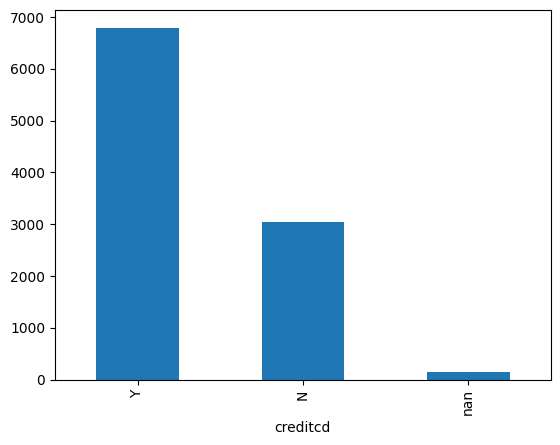

In [22]:
df['creditcd'].value_counts(dropna=False).plot(kind='bar',)

<Axes: ylabel='count'>

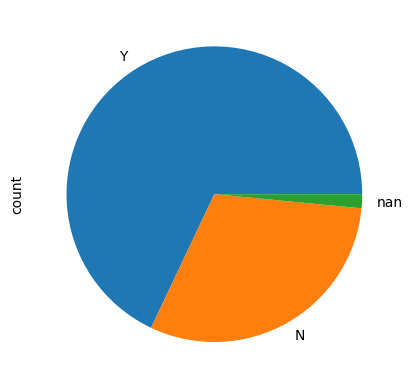

In [23]:
df['creditcd'].value_counts(dropna=False).plot(kind='pie')

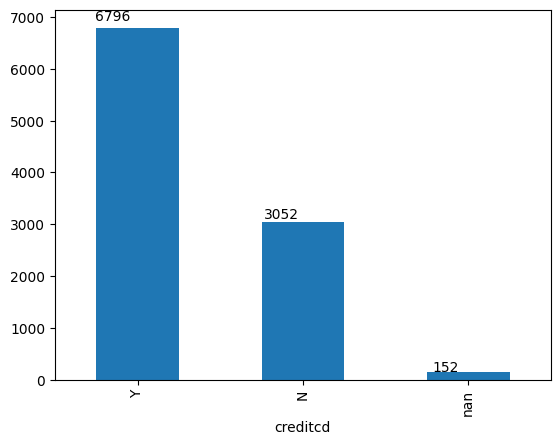

In [27]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
ax = df['creditcd'].value_counts(dropna=False).plot(kind='bar')

# Añadir etiquetas numéricas a cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))

# Mostrar el gráfico
plt.show()


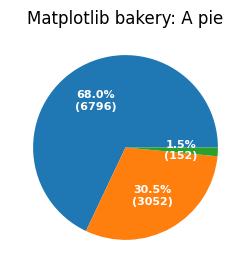

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data_pie=df['creditcd'].value_counts(dropna=False)


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = ax.pie(data_pie, autopct=lambda pct: func(pct, data_pie),
                                  textprops=dict(color="w"))


plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [31]:
df['totmou'].mean()

np.float64(7692.8048656727005)

In [32]:
df['totmou'].median()

np.float64(5262.0)

In [33]:
df['totmou'].value_counts()

totmou
6891.0    6
1581.0    6
1710.0    6
4106.0    6
1193.0    5
         ..
4898.0    1
3850.0    1
4281.0    1
6473.0    1
2812.0    1
Name: count, Length: 7433, dtype: int64

### Dispersion

In [35]:
## Rango
df['totmou'].max()-df['totmou'].min()

np.float64(163264.1767)

In [36]:
## medidas de posición (cuantiles)

### Son los valores que dividen a un conjunto de datos ordenados en partes, según la proporción de datos que se quiere obtener.

## Percentiles

for percentil in np.arange(0,1.1,0.1):
    print(f"Percentil {percentil*100}: {df['totmou'].quantile(percentil)}")

Percentil 0.0: 0.0
Percentil 10.0: 1157.9
Percentil 20.0: 2116.8
Percentil 30.000000000000004: 3040.7000000000003
Percentil 40.0: 4056.0
Percentil 50.0: 5262.0
Percentil 60.00000000000001: 6682.800000000004
Percentil 70.0: 8630.3
Percentil 80.0: 11295.800000000007
Percentil 90.0: 16654.1
Percentil 100.0: 163264.1767


###

In [37]:
### Quartiles
for percentil in np.arange(0,1.1,0.25):
    print(f"Percentil {percentil*100}: {df['totmou'].quantile(percentil)}")

Percentil 0.0: 0.0
Percentil 25.0: 2576.0
Percentil 50.0: 5262.0
Percentil 75.0: 9823.25
Percentil 100.0: 163264.1767


<Axes: >

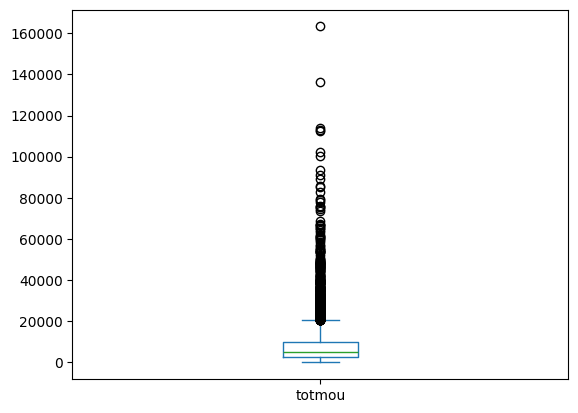

In [38]:
df['totmou'].plot(kind='box')

In [40]:
IQR=df['totmou'].quantile(0.75)-df['totmou'].quantile(0.25)

print(f"Q1: {df['totmou'].quantile(0.25)}")
print(f"Q3: {df['totmou'].quantile(0.75)}")

print(f"Rango intercuartilico: {IQR}")

Q1: 2576.0
Q3: 9823.25
Rango intercuartilico: 7247.25


In [41]:
df['totmou'].std()

np.float64(8657.917883024007)

In [42]:
df['totmou'].var()

np.float64(74959542.0691869)

In [43]:
### Resumen de métricas con python

df['totmou'].describe()

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

In [44]:
df['totmou'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
10%        1157.900000
20%        2116.800000
30%        3040.700000
40%        4056.000000
50%        5262.000000
60%        6682.800000
70%        8630.300000
80%       11295.800000
90%       16654.100000
max      163264.176700
Name: totmou, dtype: float64

<Axes: ylabel='Frequency'>

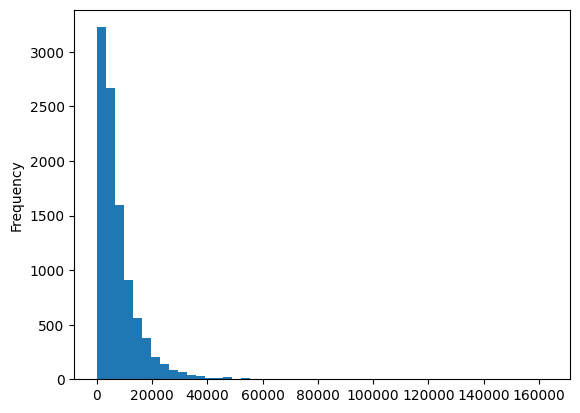

In [45]:
###
df['totmou'].plot(kind='hist',bins=50)

In [47]:
### Asimetría

print(df['totmou'].skew())

## Curtosis

print(df['totmou'].kurt())


4.326137332645958
37.279895941232276


La asimetría es una medida de la falta de simetría en la distribución de los datos. En otras palabras, describe cuán sesgados están los datos. La asimetría puede ser positiva, negativa o cero.	

$

### Análisis dos variables categoricas


Creamos una variable nueva que particione al grupo en tres categorias segun su consumo de minutos, para ello usamos la media y la desviación estándar de la variable `totmou` y creamos una nueva variable llamada `consumo` que particione a los clientes en tres categorias:

In [48]:
def particion(x):
    media=df['totmou'].mean()
    devest=df['totmou'].std()
    if x<media-0.5*devest:
        return "Bajo"
    elif x>media+0.5*devest:
        return "Alto"
    else:
        return "Medio"

df['consumo']=df['totmou'].apply(particion)

In [49]:
df['consumo'].value_counts(dropna=False)   

consumo
Medio    4862
Bajo     3325
Alto     1813
Name: count, dtype: int64

In [50]:
print(df['totmou'].mean()+0.5*df['totmou'].std())
print(df['totmou'].mean()-0.5*df['totmou'].std())

12021.763807184703
3363.845924160697


In [55]:
### Tabla de frcuencias conjuntas y marginales

### creditcd y consumo

tabla=pd.crosstab(df['creditcd'],df['consumo'],margins=False,dropna=False)
tabla

consumo,Alto,Bajo,Medio
creditcd,,,
N,626,872,1554
Y,1161,2397,3238
NaN,26,56,70


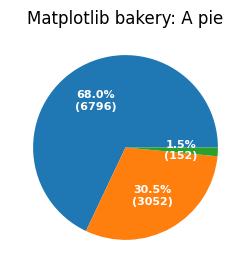

In [56]:
### Grafico de anillos anidados para las variables creditcd y consumo

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data_pie=df['creditcd'].value_counts(dropna=False)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"
wedges, texts, autotexts = ax.pie(data_pie, autopct=lambda pct: func(pct, data_pie),
                                  textprops=dict(color="w"))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

<Axes: xlabel='creditcd'>

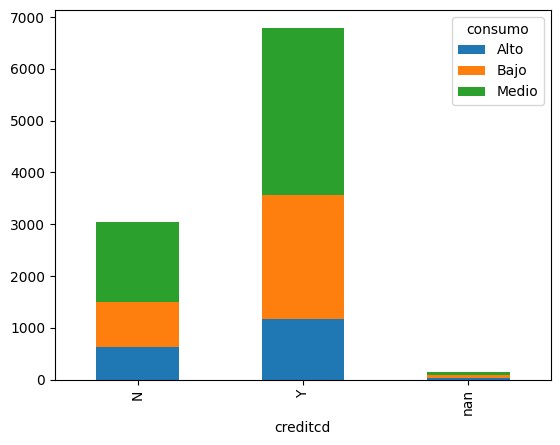

In [62]:
pd.crosstab(df['creditcd'],df['consumo'],margins=False,dropna=False).plot(kind='bar',stacked=True)

## Variablee categorica vs Numerica

<Axes: title={'center': 'totmou'}, xlabel='creditcd'>

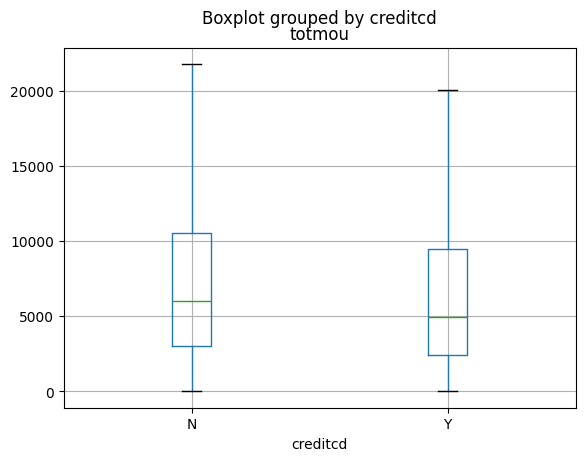

In [64]:
## Creamos un boxplot para la variable totmou, segmentando por la variable creditcd sin outliers

df.boxplot(column='totmou',by='creditcd',showfliers=False)



In [68]:
df.groupby('creditcd')['totmou'].mean()

creditcd
N    8288.588805
Y    7432.629588
Name: totmou, dtype: float64

In [69]:
df.groupby('creditcd').agg({'totmou':['mean','std','median','min','max']})

totmou                                        
                 mean          std  median   min          max
creditcd                                                     
N         8288.588805  8620.154772  6021.5  12.0  163264.1767
Y         7432.629588  8668.288580  4964.5   0.0  136445.0000

In [70]:
df.groupby('creditcd').agg({'totmou':['mean','std','median','min','max'],
                            'totrev':['mean','std','median','min','max']})

totmou                                               totrev  \
                 mean          std  median   min          max         mean   
creditcd                                                                     
N         8288.588805  8620.154772  6021.5  12.0  163264.1767  1035.948303   
Y         7432.629588  8668.288580  4964.5   0.0  136445.0000  1045.155534   

                                               
                 std  median    min       max  
creditcd                                       
N         876.743656  806.72  37.39  12583.69  
Y         849.418662  827.50  11.10  13426.60

<Axes: xlabel='totmou', ylabel='totrev'>

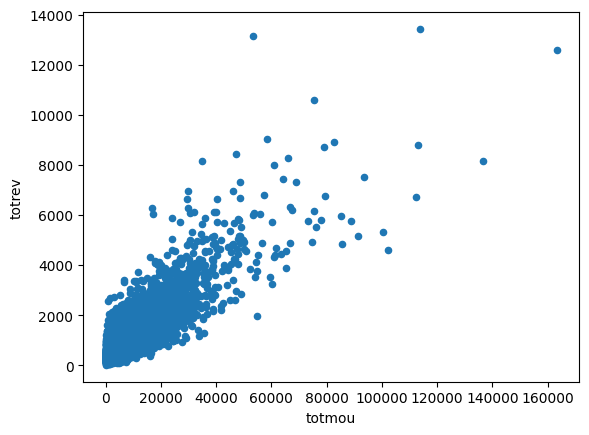

In [71]:
df.plot(kind='scatter',x='totmou',y='totrev')

<Axes: xlabel='totmou', ylabel='totrev'>

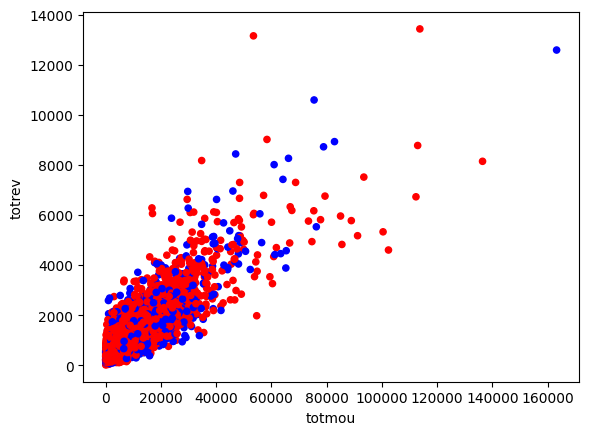

In [78]:
df['Color']=df['creditcd'].apply(lambda x: 'red' if x=='Y' else 'blue')
df.plot(kind='scatter',x='totmou',y='totrev',c=df['Color'])

In [74]:
df.select_dtypes(exclude='object').corr()

,totmou,totrev,eqpdays
totmou,1.000000,0.835485,-0.110179
totrev,0.835485,1.000000,0.061617
eqpdays,-0.110179,0.061617,1.000000


El conjunto de datos se encuentra en el `DataFrame` `df`

sobre el objeto creado podemos usar  algunas funciones  para darnos una idea del comportamiento de la información:
```python
df.head(n)  # imprime los primeros n registros del DataFrame
df.tail(n)  # imprime los últimos n registros del DataFrame 
df.shape    # imprime el numero de columnas y filas del DataFrame
df.columns  # imprime el nombre de las columnas del DataFrame
df.index    # imprime el indice de los registros del DataFrame
df.dtypes   # imprime el tipo de cada una de las columnnas del DataFrame
df.sample(n)# imprime una muestra aleatoria de n registros en el DataFrame
```

In [65]:
display("primeros 3 registros",df.head(3))
display("3 últimos registros",df.tail(3))
display("Columnas:",df.columns)
display("Índices:",df.index)
display("Tipos de registros en el DataFrame",df.dtypes)
display("Muestra aleatoria de 3 registros",df.sample(3))
display("dimensión",df.shape)

'primeros 3 registros'

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1082423,7269.0,906.58,Y,371,Medio
1069232,13552.0,1172.25,N,83,Alto
1031705,4152.0,577.39,Y,675,Medio


'3 últimos registros'

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1096497,3690.0,294.29,Y,212,Medio
1087248,3333.0,233.08,Y,290,Bajo
1099003,5025.0,1436.49,Y,1029,Medio


'Columnas:'

Index(['totmou', 'totrev', 'creditcd', 'eqpdays', 'consumo'], dtype='object')

'Índices:'

Index([1082423, 1069232, 1031705, 1089806, 1076695, 1091652, 1043846, 1088967,
       1045239, 1046584,
       ...
       1087145, 1002540, 1044082, 1083458, 1093976, 1027614, 1098422, 1096497,
       1087248, 1099003],
      dtype='int64', name='Customer_ID', length=10000)

'Tipos de registros en el DataFrame'

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
consumo      object
dtype: object

'Muestra aleatoria de 3 registros'

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1072647,595.0,649.47,Y,410,Bajo
1001835,24661.0,2226.55,Y,218,Alto
1049517,21405.0,1438.68,Y,395,Alto


'dimensión'

(10000, 5)

Este conjunto de datos corresponde a 10000 registros y 2 variables

### Manejo de datos duplicados 

os dataframes tienen la posibilidad de detectar las filas duplicadas con la función: 
```
df.duplicated({columns})
```
Si no especifica {columns}, se busacarán duplicados teniendo en cuenta todas las columnas. Una vez detectados el dtaframe tiene un función para eliminar filas duplicadas, haciendo:

```
df = df.drop_duplicates()
```
También es posible eliminar filas que duplican solo algunos campos. Con el fin de dejar solo una ocurrencia.

```
df.drop_duplicates(['nombre', 'apellido', 'cédula'], keep='last')
```
En este caso, como no todas las colomnas son iguales se conserva solo la última ocurrencia.

### Manejo de datos perdidos o esperados
Son aquellos datos flatantes en la tabla que por alguna razón o error no se encuentran, o parecen con algún valor o etiqueta de no válido. 
Para manipular datos perdidos use la explicación dada el siguiente enlace: [DATOS PERDIDOS](http://ligdigonzalez.com/manipulando-datos-perdidos-en-python/)
recuerde que para reemplazar datos perdidos en un dataframe $df$ se usa la función:
```python
promedio = df['totrev'].mean()
df['nota'].replace(np.nan, promedio)
```
en donde la opción 'promedio' busca el valor promedio de la columna (datos numéricos) o la moda (datos categóricos) para reemplazar el valor no válido.


In [ ]:
df.isnull().any(axis=0)

In [ ]:
perd=df.isnull().any(axis=1)

In [ ]:
df[perd]

In [ ]:
perdidos = df[df.isnull().any(axis=1)]
perdidos

In [ ]:
df['totrev']

In [ ]:
promedio = df['totrev'].mean()
df['totrev']=df['totrev'].replace(np.nan, promedio)

También es recomendado usar la funcion `fillna()`

In [ ]:
df['creditcd'].fillna("Y",inplace=True)

In [ ]:
df[perd]

In [ ]:
df.isnull().any(axis=0)

In [ ]:
df



### Cálculo de estadísticas resumen

Las medidas estadísticas resumen son de gran ayuda para comprender como es el comportamiento de la distribución de los datos, los objetos `DataFrame` ofrecen facilidades para hacer el cálculo de algunas estadísticas sobre cada una de las variables.

```python
df["var"].value_counts() # Encuentra la frecuencia de las categorias de una columna (la columna debe ser cualitativa)
df["var"].min()          # Encuentra el mínimo de una variable cuantitativa
df["var"].median()       # Encuentra el mínimo de una variable cuantitativa
df["var"].mean()         # Encuentra el promedio de una variable cuantitativa
df["var"].max()          # Encuentra el máximo de una variable cuantitativa
df["var"].quantile()     # Encuentra los cuantiles de una variable cuantitativa
```


In [ ]:
df["creditcd"].value_counts()

In [ ]:
df["creditcd"].count()

In [ ]:
df["eqpdays"].min()

In [ ]:
df["eqpdays"]=[0 if i<0 else i for i in df["eqpdays"] ]

In [ ]:
df["eqpdays"].min()

La exploración del anterior resultado puede mostrar inconsistencias  en los registros y nos ayudará a tomar decisiones sobre algunos registros, el valor mínimo de la variable `eqpdays` (Número de días (antigüedad) del equipo actual) debería ser estrictamente positivo y estos pueden ser errores de ingreso.

In [ ]:
df["eqpdays"].max()

In [ ]:
df["eqpdays"].median()

In [ ]:
df["eqpdays"].mean()

In [ ]:
df["eqpdays"].quantile(0.25)

In [ ]:
df["eqpdays"].quantile(0.75)

Estas estadísticas pueden ser resumidas con el comando:
```python
df["var"].describe()  # Estadísticas resumen principales
```

In [ ]:
df["eqpdays"].describe()

In [ ]:
df['creditcd'].describe()

In [ ]:
df.describe()

In [ ]:
df.describe(include='all')

### Agregar información de múltiples tablas

Hemos desarrollado un breve resumen estadístico solamente usando la base `Credito_dias.csv`. Realizaremos la combinación de las 19 áreas que nos reportan en los archivos csv. Una forma de lograr esta tarea de agregación es usar el método pd.concat() de pandas. Una entrada en este método puede ser una lista de DataFrames que quiera concatenar. Usaremos un ciclo  `for` sobre cada uno de los archivos de áreas para 


In [ ]:
df.columns
df.dtypes

### Ejercicio 1
Determinar los percentiles 25, 50 y 75 para las columnas ttomou, totrev, eqpdays

In [ ]:
#Espacio para el desarrollo del ejercicio
df["totmou"].describe()

In [ ]:
df["totrev"].describe()

In [ ]:
df.describe(include='all')

In [79]:
import os
os.listdir("../Datos/Clase 2")

['.ipynb_checkpoints',
 'ATLANTIC SOUTH AREA.csv',
 'CALIFORNIA NORTH AREA.csv',
 'CENTRAL-SOUTH TEXAS AREA.csv',
 'CHICAGO AREA.csv',
 'Credito_dias.csv',
 'DALLAS AREA.csv',
 'DC-MARYLAND-VIRGINIA AREA.csv',
 'GREAT LAKES AREA.csv',
 'HOUSTON AREA.csv',
 'LOS ANGELES AREA.csv',
 'MIDWEST AREA.csv',
 'NEW ENGLAND AREA.csv',
 'NEW YORK CITY AREA.csv',
 'NORTH FLORIDA AREA.csv',
 'NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'OHIO AREA.csv',
 'PHILADELPHIA AREA.csv',
 'SOUTH FLORIDA AREA.csv',
 'SOUTHWEST AREA.csv',
 'TENNESSEE AREA.csv']

In [80]:
print("Definición de los símbolos de las acciones")
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA']
lista_de_df = []
# Bucle sobre los símbolos
print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv("../Datos/Clase 2/" + i + ".csv",index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
    print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
print("Agregando los datos")
agr_df = pd.concat(lista_de_df, axis=0)
print(agr_df.shape)
print("Cabeza del DataFrame agr_df: ")
agr_df.head()

Definición de los símbolos de las acciones
 --- Inicie el bucle sobre los símbolos --- 
Procesando el símbolo: ATLANTIC SOUTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CALIFORNIA NORTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CENTRAL-SOUTH TEXAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CHICAGO AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DALLAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DC-MARYLAND-VIRGINIA AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: GREAT LAKES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: HOUSTON AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: LOS ANGELES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: MIDWEST AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: NEW ENGLAND AREA
 --- Bucle com

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,ATLANTIC SOUTH AREA,N
1043846,0.000000,U,ATLANTIC SOUTH AREA,Y
1008539,0.000000,N,ATLANTIC SOUTH AREA,Y
1068315,0.000000,U,ATLANTIC SOUTH AREA,N
1074220,1.666667,U,ATLANTIC SOUTH AREA,N


In [81]:
agr_df.sort_index(axis=0,inplace=True)
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH TEXAS AREA,N
1000016,1.000000,N,DALLAS AREA,Y
1000021,0.333333,U,TENNESSEE AREA,Y
1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN AREA,N
1000029,0.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...
1099907,17.333333,U,LOS ANGELES AREA,Y
1099932,0.000000,U,LOS ANGELES AREA,Y
1099963,0.000000,U,SOUTHWEST AREA,Y


La ejecución nos da como resultado una base de datos de 9997 registros correspondiente a la concatenación de todas las áreas. Se debe notar que nuestro conjunto de datos también es indexado por la columna `Customer_ID` y que la dimensión de los registros de está nueva base es menor a la de  `Creditos_dias.csv`.

 ## Cruce de información

El cruce de información es una operación esencial en el análisis de los datos. Usualmente, la posibilidad de realizar el cruce de dos o más fuentes de información es el primer paso para responder preguntas complejas acerca de los datos. Existen muchas formas de cruzar o combinar tablas de datos. El cruce de estos datos siempre tiene un propósito. Por tanto, se debe realizar un análisis de lo que se requiere antes de iniciar. Para esto, lo primero es conocer bien las fuentes de información que se van a relacionar. 

### Uniones (Joins)
Usando la librería pandas se pueden realizar 4 tipos de uniones para cruzar información entre dos fuentes de datos, ver Figura abajo. 
* INNER JOIN: este tipo de cruce incluye solo los resgistros que coincieden en las dos tablas
* LEFT JOIN:  en este tipo de cruce se incluyen todos los registros de la primera tabla aunque no aparezcan coincidencias en la segunda. Cuando no hay coincidencias en la segunda tabla los campos correspondientes a esta aparecerán como nulos.
* RIGHT JOIN: en este tipo de cruce se incluyen todos los registros de la segunda tabla aunque no aparezcan coincidencias en la primera. Cuando no hay coincidencias en la primer tabla los campos correspondientes a esta aparecerán como nulos.
* OUTER JOIN O FULL JOIN: combina todos los registros de ambas tablas aunque no existan coincidencias en la otra tabla. 

![Los tipos de uniones que se pueden ejecutar en pandas](https://letsdobigdata.files.wordpress.com/2016/03/joins.png)

La combinación a usar depende del análisis que se requiera con los datos. Lo más común es realizar un cruce de tipo Inner Join, debido a que muestra los registros cuando aparecen relacionados en ambas tablas. Sin embargo, en 
ocasiones se quiere saber que pasa con todos los registros de la primera tabla aunque no se tengan coincidencias. Alternativamente, quizá, lo menos usual es hacer combinaciones de tipo RIGHT o OUTER. Generalmente, estas son usadas cuando se quiere saber por qué no se tienen coincidencias, o cuáles registros no cumplen con la relación especificada.

Ya que desconocemos cuales son los registros perdidos en los 2 dataframes que hemos construido y es necesario para continuar nuestro preprocesamiento el unir la información.

In [84]:
df_sin_indices=df.reset_index()
df_sin_indices

,Customer_ID,totmou,totrev,creditcd,eqpdays,consumo,Color
0,1082423,7269.0,906.58,Y,371,Medio,red
1,1069232,13552.0,1172.25,N,83,Alto,blue
2,1031705,4152.0,577.39,Y,675,Medio,red
3,1089806,1863.0,294.26,Y,218,Bajo,red
4,1076695,4155.0,433.16,N,222,Medio,blue
...,...,...,...,...,...,...,...
9995,1027614,2570.0,484.31,Y,611,Bajo,red
9996,1098422,2105.0,583.36,Y,1243,Bajo,red
9997,1096497,3690.0,294.29,Y,212,Medio,red
9998,1087248,3333.0,233.08,Y,290,Bajo,red


In [85]:
agr_df_sin_indices=agr_df.reset_index()
agr_df_sin_indices

,Customer_ID,custcare_Mean,new_cell,area,creditcd
0,1000014,0.000000,Y,CENTRAL-SOUTH TEXAS AREA,N
1,1000016,1.000000,N,DALLAS AREA,Y
2,1000021,0.333333,U,TENNESSEE AREA,Y
3,1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN AREA,N
4,1000029,0.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...,...
9992,1099907,17.333333,U,LOS ANGELES AREA,Y
9993,1099932,0.000000,U,LOS ANGELES AREA,Y
9994,1099963,0.000000,U,SOUTHWEST AREA,Y
9995,1099981,0.333333,U,SOUTHWEST AREA,NaN


In [86]:
df3=df.merge(agr_df,left_index=True,right_index=True,how="inner")
df3

,totmou,totrev,creditcd_x,eqpdays,consumo,Color,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,,,
1082423,7269.0,906.58,Y,371,Medio,red,14.333333,U,NEW ENGLAND AREA,Y
1069232,13552.0,1172.25,N,83,Alto,blue,3.666667,U,ATLANTIC SOUTH AREA,N
1031705,4152.0,577.39,Y,675,Medio,red,3.000000,U,NEW YORK CITY AREA,Y
1089806,1863.0,294.26,Y,218,Bajo,red,11.000000,U,CHICAGO AREA,Y
1076695,4155.0,433.16,N,222,Medio,blue,0.000000,U,NORTH FLORIDA AREA,N
...,...,...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,Bajo,red,0.666667,U,CHICAGO AREA,Y
1098422,2105.0,583.36,Y,1243,Bajo,red,0.000000,U,SOUTHWEST AREA,Y
1096497,3690.0,294.29,Y,212,Medio,red,0.666667,Y,NEW ENGLAND AREA,Y


In [89]:
df3_sin_indices=df_sin_indices.merge(agr_df_sin_indices,left_on=["Customer_ID"],right_on=["Customer_ID"],how="left")

In [90]:
df3_sin_indices

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,consumo,Color,custcare_Mean,new_cell,area,creditcd_y
0,1082423,7269.0,906.58,Y,371,Medio,red,14.333333,U,NEW ENGLAND AREA,Y
1,1069232,13552.0,1172.25,N,83,Alto,blue,3.666667,U,ATLANTIC SOUTH AREA,N
2,1031705,4152.0,577.39,Y,675,Medio,red,3.000000,U,NEW YORK CITY AREA,Y
3,1089806,1863.0,294.26,Y,218,Bajo,red,11.000000,U,CHICAGO AREA,Y
4,1076695,4155.0,433.16,N,222,Medio,blue,0.000000,U,NORTH FLORIDA AREA,N
...,...,...,...,...,...,...,...,...,...,...,...
9995,1027614,2570.0,484.31,Y,611,Bajo,red,0.666667,U,CHICAGO AREA,Y
9996,1098422,2105.0,583.36,Y,1243,Bajo,red,0.000000,U,SOUTHWEST AREA,Y
9997,1096497,3690.0,294.29,Y,212,Medio,red,0.666667,Y,NEW ENGLAND AREA,Y
9998,1087248,3333.0,233.08,Y,290,Bajo,red,0.000000,U,CALIFORNIA NORTH AREA,Y


In [92]:
df3_sin_indices[df3_sin_indices['area'].isna()]

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,consumo,Color,custcare_Mean,new_cell,area,creditcd_y
3381,1050270,1409.0,407.02,Y,102,Bajo,red,NaN,NaN,NaN,NaN
4281,1020629,15284.0,2370.62,N,445,Alto,blue,NaN,NaN,NaN,NaN
7384,1020451,3604.0,662.42,Y,675,Medio,red,NaN,NaN,NaN,NaN


In [100]:
df_3_sin_indices_bajos=df3_sin_indices[df3_sin_indices['consumo']=="Bajo"]
df_3_sin_indices_bajos

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,consumo,Color,custcare_Mean,new_cell,area,creditcd_y
3,1089806,1863.0,294.26,Y,218,Bajo,red,11.000000,U,CHICAGO AREA,Y
10,1076771,288.0,374.98,Y,284,Bajo,red,0.000000,U,NEW ENGLAND AREA,Y
11,1057800,2030.0,1026.31,Y,439,Bajo,red,0.000000,Y,NORTHWEST-ROCKY MOUNTAIN AREA,Y
12,1083737,1928.0,396.78,Y,261,Bajo,red,0.000000,U,NEW ENGLAND AREA,Y
15,1097730,810.0,240.94,N,131,Bajo,blue,0.000000,U,SOUTHWEST AREA,N
...,...,...,...,...,...,...,...,...,...,...,...
9983,1033261,118.0,402.41,Y,560,Bajo,red,0.000000,U,NEW YORK CITY AREA,Y
9986,1072688,978.0,117.79,Y,241,Bajo,red,0.000000,Y,LOS ANGELES AREA,Y
9995,1027614,2570.0,484.31,Y,611,Bajo,red,0.666667,U,CHICAGO AREA,Y
9996,1098422,2105.0,583.36,Y,1243,Bajo,red,0.000000,U,SOUTHWEST AREA,Y


In [98]:
df3_sin_indices[~df3_sin_indices['consumo'].isin(['Bajo','Alto'])]

,Customer_ID,totmou,totrev,creditcd_x,eqpdays,consumo,Color,custcare_Mean,new_cell,area,creditcd_y
0,1082423,7269.0,906.58,Y,371,Medio,red,14.333333,U,NEW ENGLAND AREA,Y
2,1031705,4152.0,577.39,Y,675,Medio,red,3.000000,U,NEW YORK CITY AREA,Y
4,1076695,4155.0,433.16,N,222,Medio,blue,0.000000,U,NORTH FLORIDA AREA,N
5,1091652,5441.0,578.80,Y,68,Medio,red,7.000000,U,NEW YORK CITY AREA,Y
6,1043846,7294.0,1495.18,Y,460,Medio,red,0.000000,U,ATLANTIC SOUTH AREA,Y
...,...,...,...,...,...,...,...,...,...,...,...
9992,1044082,6646.0,953.91,N,446,Medio,blue,6.666667,U,NORTH FLORIDA AREA,N
9993,1083458,10628.0,965.57,Y,262,Medio,red,6.666667,U,NEW ENGLAND AREA,Y
9994,1093976,6531.0,663.21,N,276,Medio,blue,11.333333,Y,PHILADELPHIA AREA,N
9997,1096497,3690.0,294.29,Y,212,Medio,red,0.666667,Y,NEW ENGLAND AREA,Y


### Ejercicio 2  
¿Cuáles son los 3 registros que no se incluyen en df3 ?


In [ ]:
df.index.isin(df3.index)

In [ ]:
sin_registros=df.index.isin(df3.index)
df.iloc[~sin_registros,]

Si deseamos realizar una filtración sobre algún valor relevante por ejemplo el área podremos revertir el proceso usando el operador `==`  que retorna `True` en el caso que dos objetos tengan el mismo valor

In [ ]:
new_england=df3[df3["area"]=="NEW ENGLAND AREA"]
new_england


El comando   `df3["area"]=="NEW ENGLAND AREA"`

In [ ]:
df3["area"]=="NEW ENGLAND AREA"

devuelve una serie boleana  con el mismo número de filas de la base`df3`, donde cada valor es `True` o `False` dependiendo si el valor de `area` de un registro  toma el valor de "NEW ENGLAND AREA" 

### Agrupación por área geográfica

En el Analisis de la información se suelen usar funciones de resumen, las cuales plantean el agrupamiento de ciertas características por categorías. Para más información consultar [gropby().](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Para nuestro desarrollo es de interés el revisar si el comportamiento de las variables se mantiene en cada una de las áreas geográficas.


In [ ]:
df3.groupby("area")

Aquí, el objeto DataFrameGroupBy  contiene un objeto DataFrame para cada grupo (en este caso, un objeto DataFrame para cada símbolo). Específicamente, cada elemento del objeto es una tupla que contiene el identificador de grupo (en este caso el símbolo), y las filas correspondientes del DataFrame que tienen ese símbolo).

La librería `pandas`  permite iterar sobre el objeto groupby() para ver lo que hay dentro:

In [ ]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Haciendo un bucle a través de los grupos
for item in group_df:
    print(type(item)) # Mostrando el tipo de artículo en df3
    print(item[0]) # área
    print(item[1].head()) # DataFrame

Usando el método  `groupby()` con el método `describe()` y apliquémoslo a cada símbolo para
analizar la distribución de las características la variable ----.

In [ ]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Bucle a través de los grupos
for item in group_df:
    print("------Área: ", item[0])
    group_df1 = item[1]
    df_relevante = group_df[["totrev"]]
    print(df_relevante.describe())

En `pandas`tenemos una manera más sencilla de mostrar estos resultados

In [ ]:
df3[["area","totrev"]].groupby("area").describe()

Estos resultados son iguales a los realizados con el ciclo `for`. Los objetos de tipo `DataFrameGroupBy` permiten una rápida salida de generación de estadísticas para grupos de interés.

### Ejercicio 3

Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar

In [ ]:
df3.groupby("creditcd_x").mean()
# realice el ejercicio en este espacio

### Etiquetando valores de total de ingresos en categorías

Revisamos el comportamiento de `totrev` y encontramos una gran variabilidad, en ocasiones la agrupación de variables cuantitativas en diferentes categorías nos ayuda a tener una mejor visión del conjunto de datos. 

Crearemos una nueva variable `Nivel_totrev`  que catalogue a la variable total de ingresos `totrev` en 2 posibles niveles, alto en el caso que `totrev`  sea mayor al cuantil 50 y baja en otro caso. cada valor de percentil debe ser calculado por cada `area` para asegurar que el +area geografíca sea evaluada adicionalmente.



In [ ]:
pencentiles50 = df3.groupby("area")["totrev"].quantile(0.5) # percentil 50
print(pencentiles50)

Como nos gustaría etiquetar los ingreos en alto y bajopara  cada área geográfica, haremos uso del método
`np.where()` en la biblioteca numpy. Este método toma una entrada y comprueba una condición lógica: si la
condición es verdadera, devolverá su segundo argumento, mientras que si la condición es falsa, devolverá su
tercer argumento. 


In [ ]:
# Loop a través de los símbolos
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto = pencentiles50.loc[i]
    temp_df["Nivel_totrev"] = np.where(temp_df["totrev"] < umbral_punto, "Bajo", "Alto") 
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)

In [ ]:
df_con_etiquetas.head()

In [ ]:
df_con_etiquetas.head()

Ahora podemos hacer una evaluaciónd de como es el comportamiento de los minutos gastados y el nivel de ingresos de los clientes

### ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Para explorar la relación entre el nivel de total de ingresos y el número promedio de llamadas, agrupemos por
Nivel_totrev y miremos ingreso total promedio por cada +area geográfica.



In [ ]:
df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean()

### Ejercicio 4


Escriba el código para categorizar  el total de ingresos  baja, media y alta volatilidad, donde:

`
si totrev > (percentil 75 de totrev para el área dada):
Nivel_totrev = 'Alto'
o si VolStat > (percentil 25 de totrev para el área dada):
Nivel_totrev  = 'Medio'
de lo contrario:
Nivel_totrev  = 'Bajo'`

In [ ]:
pencentiles25 = df3.groupby("area")["totrev"].quantile(0.25) # percentil 50
pencentiles75 = df3.groupby("area")["totrev"].quantile(0.75)

In [ ]:
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto1 = pencentiles25.loc[i]
    umbral_punto2 = pencentiles75.loc[i]
    lv=[]
    for i in temp_df['totrev']:
        if i<umbral_punto1:
            lv.append('Bajo')
        elif i<umbral_punto2:
            lv.append('Medio')
        else:
            lv.append('Alto')
    temp_df['Nivel']=lv
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)
# realice el ejercicio en este espacio

In [ ]:
df_con_etiquetas

In [ ]:
df_con_etiquetas.groupby(['area','Nivel'])[['totmou']].mean()

### Visualización de total de llamadas y total de ingresos

Ya hemos respondido satisfactoriamente a nuestra pregunta original. Sin embargo, no es necesario solamente
analizar los datos en formato tabular. Python contiene una funcionalidad que le permite analizar sus datos
visualmente también.

Usaremos la funcionalidad de pandas sobre la librería estándar de graficación de Python, `matplotlib`. Vamos
a importar la librería e instruir a Jupyter que muestre los gráficos en línea (es decir, mostrar los gráficos en
la pantalla del cuaderno para que podamos verlos mientras ejecutamos el código):



In [ ]:
modules = dir()
print(modules)

In [ ]:
import matplotlib.pyplot as plt
# Graficar en el cuaderno
%matplotlib inline

#### Histograma

In [ ]:
plt.style.use('ggplot')
plt.hist(df3["totrev"],bins=13,color="#237AAF")
plt.title('Histograma de variable totrev')
plt.xlabel("totrev");plt.ylabel("Frecuencia")
plt.show()

In [ ]:
print(plt.style.available)

#### Boxplot

In [ ]:
plt.style.use('ggplot')
plt.boxplot(df3["totrev"])
plt.title('Boxplot de variable totrev')
plt.show()

#### Gráficas a partir de `groupby`

In [ ]:
df4=df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean()
df4.plot(kind='barh',figsize=(10,8))
plt.show()

#### Gráficas de `pandas`  

El modulo`.plot()` genera por defecto una gráfica de línea, existen varios gráficos para los `DataFrameGroup`

    - 'line' : Gráfica de línea
    - 'bar' :  Diagrama de barras vertical
    - 'barh' : Diagrama de barras horizontal
    - 'hist' : histograma
    - 'box' : boxplot
    - 'kde' : Kernel de densidad
    - 'area' : Gráfica de área
    - 'pie' : Diagrama de torta
    - 'scatter' : Diagrama de dispersión
    - 'hexbin' : Diagrama de hexágonos

In [ ]:
df3.columns

In [ ]:
df3["creditcd_x"].value_counts().plot(kind="pie")
plt.show()

Revisando la relación entre las dos variables `totrev` y `totmou`

In [ ]:
df3.plot(kind="scatter",x='totrev',y='totmou',c='blue')

### `Seaborn`

In [ ]:
import seaborn as sns
sns.boxplot(df3["totrev"],orient='v')
plt.title('Boxplot de variable totrev')
plt.show()

### Gráficas de parcela 

In [ ]:
df3

In [ ]:
plt.figure(figsize=(116,4))
sns.pairplot(data=df3, hue='creditcd_x', vars=['totrev','totmou','eqpdays'])
plt.title("Parcelas")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Nivel_totrev',y='totmou',data=df_con_etiquetas)
plt.title('Boxplot múltiple para Nivel de ingresos totales y \n total de minutos gastados')
plt.show()

In [ ]:
sns.catplot(y="totmou", x="Nivel_totrev", kind="box",    data=df_con_etiquetas, height=4, aspect=4, palette='Set2')
sns.catplot(y="totmou", x="Nivel_totrev", kind="violin", data=df_con_etiquetas, height=4, aspect=4, palette='Set2')

In [ ]:
ax = sns.catplot(y="totmou", x="Nivel_totrev", hue='creditcd_x', kind='point',data=df_con_etiquetas, aspect=2)
ax = sns.catplot(x="Nivel_totrev", kind='count',data=df_con_etiquetas, col='creditcd_x')

### Ejercicio 5

Realice un  boxplot para la variable totmou segmentado por las variable  credict_x y Nivel_totrev

In [ ]:
# realice el ejercicio en este espacio

## Resumen


1. Leer datos desde archivos.
2. Agregar y manipular datos .
3. Analizar estadísticas de resumen y reunir información.
4. Usar matplotlib para crear gráficos para hacer análisis visual, además de otras librerías.

Para más información

> [https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)